# Salary-Experience Dataset

#### Importing libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#### Loading data:

In [3]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#### To check the dimension:

In [4]:
df.shape

(30, 2)

#### Checking null values:

In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

#### Split the dataset:

In [6]:
x = df['YearsExperience']
y = df['Salary']

#### Plotting the dataset:

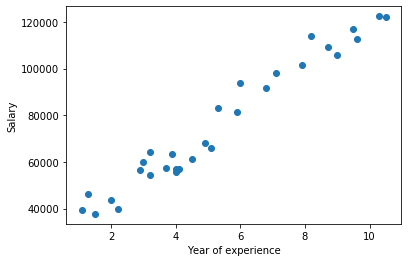

In [7]:
plt.scatter(x,y)
plt.xlabel('Year of experience')
plt.ylabel('Salary')
plt.show()

#### Using OLS:

In [8]:
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.14e-20
Time:                        18:40:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model Visualization:

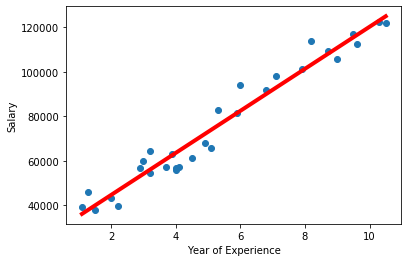

In [9]:
plt.scatter(x,y)
yhat=25790+x*9449.9623 ## Nothing but Y = b0+b1*x1
# b0=constant, b1=co-eff of indep-var, x=indep-var.
fig = plt.plot(x,yhat,lw=4,c='r',label='Regression Line') # to draw the prediction.
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

#### Actual VS Predicted:

In [10]:
df1 = pd.DataFrame({'Actual': y, 'Predicted': yhat})
df1

,Actual,Predicted
0,39343.0,36184.95853
1,46205.0,38074.95099
2,37731.0,39964.94345
3,43525.0,44689.92460
4,39891.0,46579.91706
5,56642.0,53194.89067
6,60150.0,54139.88690
7,54445.0,56029.87936
8,64445.0,56029.87936
9,57189.0,60754.86051


#### Let's test our model using "NEW_DATA":

In [11]:
# creating a new dataframe:
new_data = pd.DataFrame({'conts': 1,'YearsExperience': [9.6,10.3,10.5,11,12,13,14,15,50]})
predictions = results.predict(new_data)
predictions

0    116511.838485
1    123126.812110
2    125016.804574
3    129741.785735
4    139191.748056
5    148641.710378
6    158091.672699
7    167541.635020
8    498290.316271
dtype: float64

In [12]:
new_data

,conts,YearsExperience
0,1,9.6
1,1,10.3
2,1,10.5
3,1,11.0
4,1,12.0
5,1,13.0
6,1,14.0
7,1,15.0
8,1,50.0


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse=mean_squared_error(y,yhat)
r2_square = r2_score(y,yhat)
rms = sqrt(mean_squared_error(y,yhat))

In [25]:
print('Mean Squared Error : ',mse)
print('RMSE :',rms)
print('R2_Square : ',r2_square)
print('Accurarcy of model : ',r2_square*100)

Mean Squared Error :  31270956.563656807
RMSE : 5592.044041641375
R2_Square :  0.9569566574795295
Accurarcy of model :  95.69566574795296
